In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

print(train.shape)
print(test.shape)
print(sub.shape)

(140700, 20)
(93800, 19)
(93800, 2)


In [3]:
train['Depression'].value_counts()/len(train)*100

Depression
0    81.828714
1    18.171286
Name: count, dtype: float64

In [4]:
print(train.columns)
train.head()

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [82]:
train.isnull().sum()/len(train) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [3]:
train.drop(columns = ['Name','Academic Pressure','CGPA','Study Satisfaction'] , inplace = True)

In [84]:
train.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [85]:
train.isnull().sum()/len(train) * 100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Work Pressure                            19.842217
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [4]:
t = ['Profession','Work Pressure','Job Satisfaction','Dietary Habits','Degree','Financial Stress']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Work Pressure                          112782 non-null  float64
 7   Job Satisfaction                       112790 non-null  float64
 8   Sleep Duration                         140700 non-null  object 
 9   Dietary Habits                         140696 non-null  object 
 10  Degree                                 140698 non-null  

In [7]:
for i in t:
    print(i  , '===' , train[i].unique() , '\n')

Profession === ['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj'] 

Work Pressure === [ 5.  4. nan  1.  2.  3.] 

Job Satisfaction === [ 2.  3. nan  1.  5.  4.] 

Dietary Habits === ['Healthy' 'Unheal

In [5]:
df = train
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [15]:
df.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [90]:
t

['Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Dietary Habits',
 'Degree',
 'Financial Stress']

In [6]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Degree'] = df['Degree'].fillna(df['Degree'].mode()[0])

In [7]:
print('Work Pressure' , df['Work Pressure'].skew())
print('Job Satisfaction' , df['Job Satisfaction'].skew())
print('Financial Stress' , df['Financial Stress'].skew())

Work Pressure 0.01851506487414507
Job Satisfaction 0.054361228561354426
Financial Stress 0.03560319889721594


In [8]:
df['Work Pressure'] = df['Work Pressure'].fillna(df['Work Pressure'].mean())
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(df['Job Satisfaction'].mean())
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())

In [12]:
df.isnull().sum()/len(df) * 100

id                                       0.0
Gender                                   0.0
Age                                      0.0
City                                     0.0
Working Professional or Student          0.0
Profession                               0.0
Work Pressure                            0.0
Job Satisfaction                         0.0
Sleep Duration                           0.0
Dietary Habits                           0.0
Degree                                   0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
Depression                               0.0
dtype: float64

In [9]:
def detect_outliers_in_columns(df):  # Finding which columns has outlier
  outlier_columns = []
  numerical_cols = df.select_dtypes(include=['number' , 'float64','int64']).columns
  for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
      outlier_columns.append(col)
  return outlier_columns


def count_of_outliers(df, outlier_columns): # Finding the count of outlier
    outlier_counts = {}
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts

In [10]:
outlier_columns = detect_outliers_in_columns(df)
print("Columns with outliers:", outlier_columns)

outlier_counts = count_of_outliers(df, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: ['Depression']
Outlier counts per column: {'Depression': 25567}


In [15]:
df.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Male,33.0,Visakhapatnam,Student,Teacher,2.998998,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [16]:
df['Depression'].value_counts()/len(df)*100

Depression
0    81.828714
1    18.171286
Name: count, dtype: float64

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , OrdinalEncoder

In [12]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])

df['City' ]  = lab.fit_transform(df['City'])
df['Profession' ]  = lab.fit_transform(df['Profession'])
df['Have you ever had suicidal thoughts ?' ]  = lab.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness' ]  = lab.fit_transform(df['Family History of Mental Illness'])
df['Degree' ]  = lab.fit_transform(df['Degree'])
df['Working Professional or Student' ]  = lab.fit_transform(df['Working Professional or Student'])

In [19]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [13]:
df.drop(columns = ['Dietary Habits'] , inplace = True)

In [21]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [14]:
df.drop(columns = ['Sleep Duration'] , inplace = True)

In [66]:
df.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0,49.0,50,1,10,5.000000,2.000000,33,0,1.0,2.0,0,0
1,1,1,26.0,93,1,55,4.000000,3.000000,63,1,7.0,3.0,0,1
2,2,1,33.0,97,0,55,2.998998,2.974404,21,1,3.0,1.0,0,1
3,3,1,22.0,64,1,55,5.000000,1.000000,28,1,10.0,1.0,1,1
4,4,0,30.0,37,1,9,1.000000,1.000000,28,1,9.0,4.0,1,0


In [15]:
y = df['Depression']
x = df.drop(columns = ['Depression'])

In [92]:
x.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,0,49.0,50,1,10,5.000000,2.000000,33,0,1.0,2.0,0
1,1,1,26.0,93,1,55,4.000000,3.000000,63,1,7.0,3.0,0
2,2,1,33.0,97,0,55,2.998998,2.974404,21,1,3.0,1.0,0
3,3,1,22.0,64,1,55,5.000000,1.000000,28,1,10.0,1.0,1
4,4,0,30.0,37,1,9,1.000000,1.000000,28,1,9.0,4.0,1


In [93]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Depression, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9,stratify=y)

In [25]:
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)


Depression
0    81.828358
1    18.171642
Name: count, dtype: float64
Depression
0    81.830135
1    18.169865
Name: count, dtype: float64


In [17]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [18]:
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)


Depression
0    50.0
1    50.0
Name: count, dtype: float64
Depression
0    81.830135
1    18.169865
Name: count, dtype: float64


In [28]:
x_train.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,18500,1,23.0,94,1,29,4.0,3.0,82,1,6.0,3.0,0
1,96448,1,53.0,14,1,13,2.0,2.0,36,1,7.0,4.0,1
2,14580,1,28.0,94,1,56,3.0,4.0,33,0,8.0,1.0,1
3,44549,1,50.0,72,1,29,1.0,1.0,84,1,12.0,1.0,1
4,87548,1,25.0,72,1,19,5.0,4.0,19,1,8.0,3.0,0


In [19]:
x_train.drop(columns = ['id'] , inplace = True)
x_test.drop(columns = ['id'] , inplace = True)

In [20]:
from sklearn.preprocessing import  StandardScaler

In [21]:
scaler = StandardScaler()
x_train_fit = scaler.fit_transform(x_train)

# Convert the result back to a DataFrame
x_train_scaled = pd.DataFrame(x_train_fit, columns=x_train.columns)

x_test_fit = scaler.fit_transform(x_test)

# Convert the result back to a DataFrame
x_test_scaled = pd.DataFrame(x_test_fit, columns=x_test.columns)

In [22]:
x_train_scaled.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.08642,-0.902367,1.448830,0.924497,-0.846432,0.791997,0.117661,1.359472,0.826266,-0.240595,-0.191195,-0.827625
1,1.08642,1.467994,-1.277276,0.924497,-1.793471,-1.043364,-0.797115,-0.494670,0.826266,0.038960,0.558116,1.208276
2,1.08642,-0.507307,1.448830,0.924497,0.751695,-0.125683,1.032438,-0.615592,-1.210263,0.318515,-1.689815,1.208276
3,1.08642,1.230957,0.699151,0.924497,-0.846432,-1.961044,-1.711891,1.440087,0.826266,1.436735,-1.689815,1.208276
4,1.08642,-0.744343,0.699151,0.924497,-1.438331,1.709677,1.032438,-1.179896,0.826266,0.318515,-0.191195,-0.827625


In [23]:

from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [24]:
models = [
    ('Logistic Regression', LogisticRegression()),

    # ('Support Vector Machine', SVC()),

    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest', RandomForestClassifier()),


    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier()),

]


In [25]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , accuracy_score

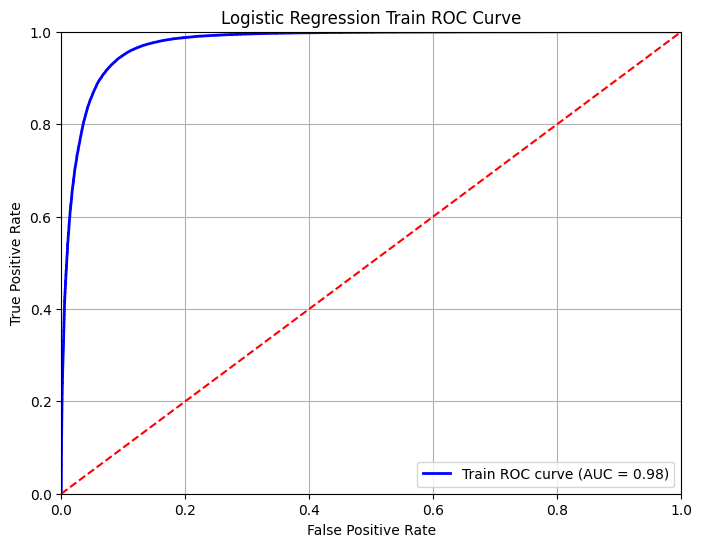

Logistic Regression Train AUC: 0.98


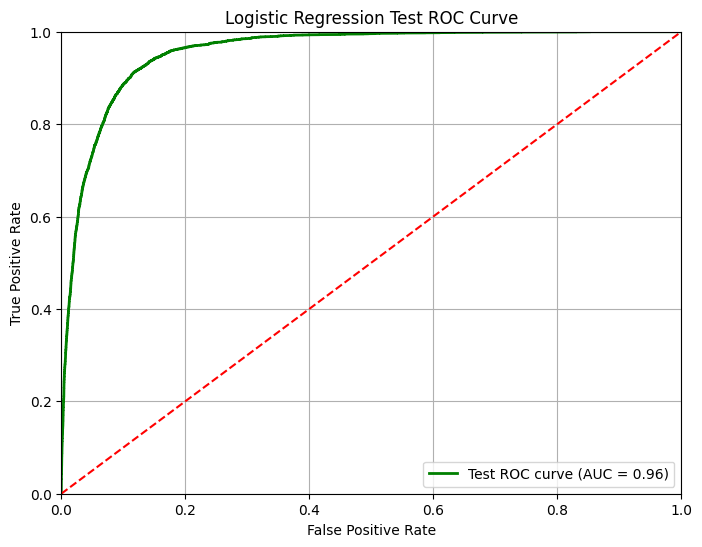

Logistic Regression Test AUC: 0.96


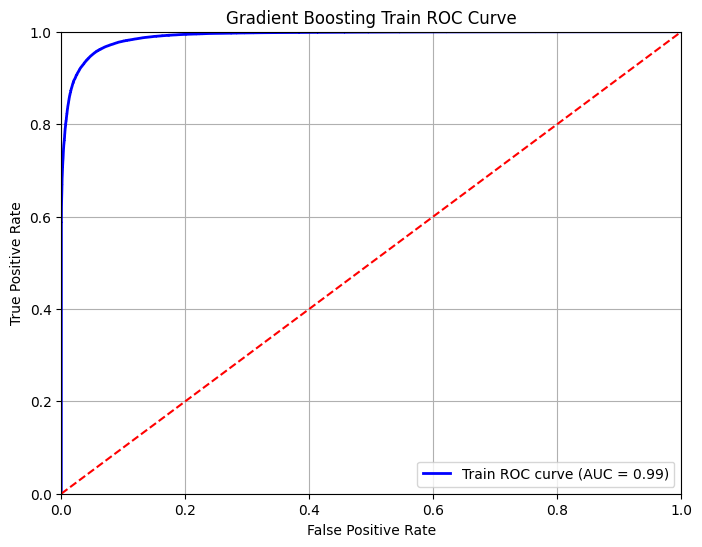

Gradient Boosting Train AUC: 0.99


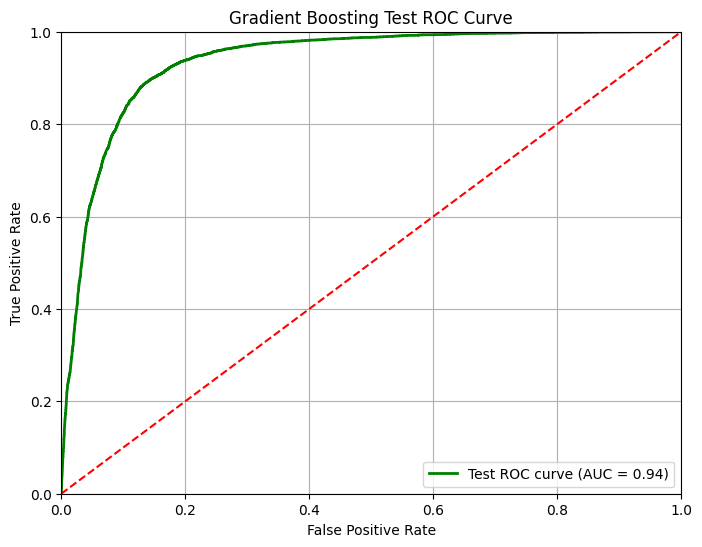

Gradient Boosting Test AUC: 0.94


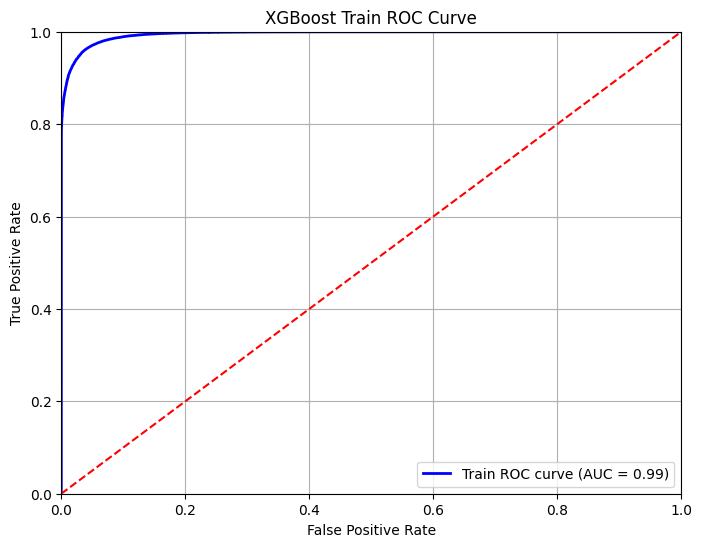

XGBoost Train AUC: 0.99


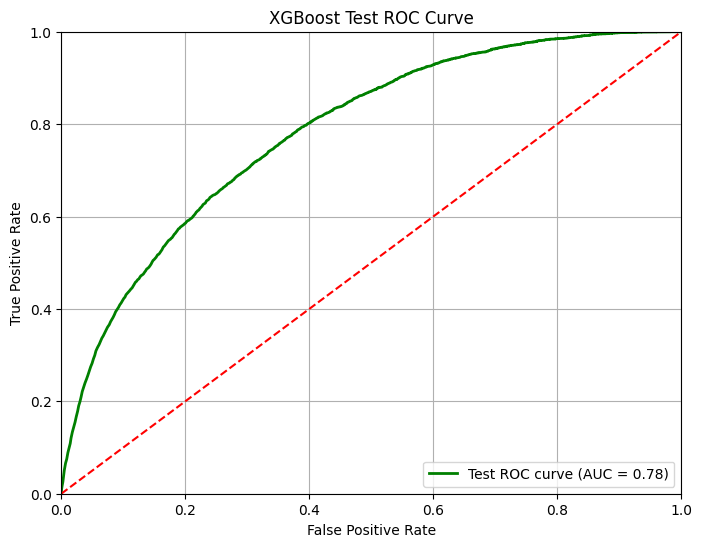

XGBoost Test AUC: 0.78
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 92106, number of negative: 92106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 184212, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


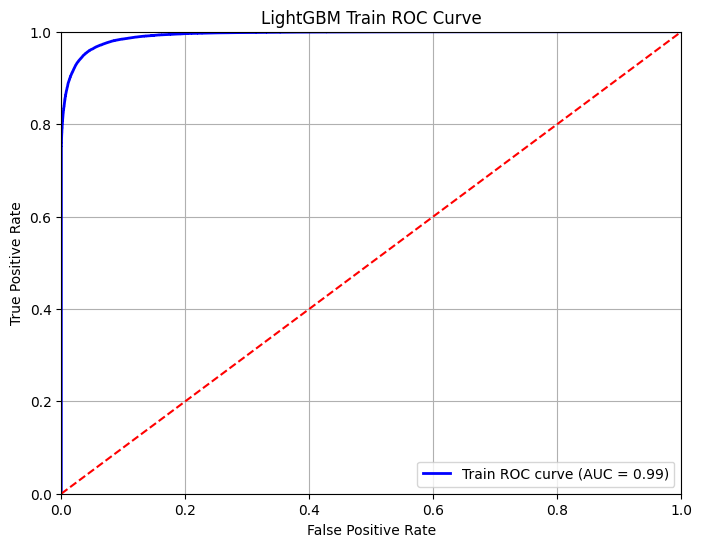

LightGBM Train AUC: 0.99


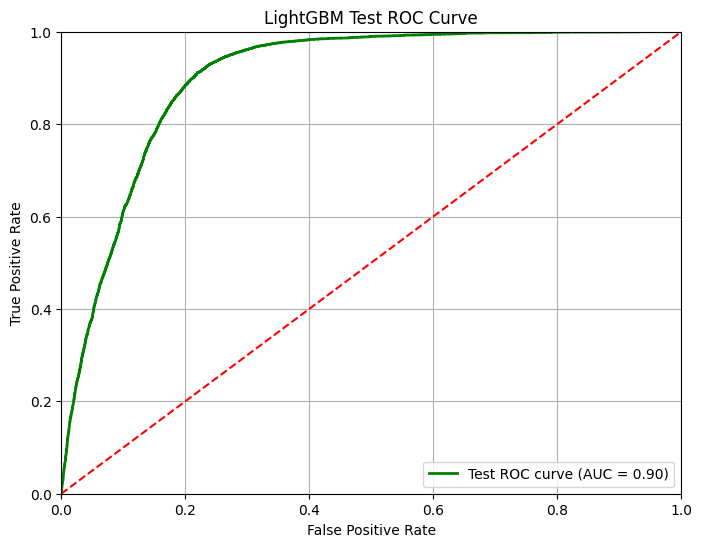

LightGBM Test AUC: 0.90
Learning rate set to 0.095549
0:	learn: 0.5350188	total: 80.9ms	remaining: 1m 20s
1:	learn: 0.4332753	total: 105ms	remaining: 52.6s
2:	learn: 0.3633908	total: 131ms	remaining: 43.6s
3:	learn: 0.3166255	total: 156ms	remaining: 38.9s
4:	learn: 0.2849669	total: 181ms	remaining: 35.9s
5:	learn: 0.2603447	total: 204ms	remaining: 33.8s
6:	learn: 0.2381601	total: 229ms	remaining: 32.5s
7:	learn: 0.2202607	total: 252ms	remaining: 31.2s
8:	learn: 0.2097884	total: 277ms	remaining: 30.4s
9:	learn: 0.2004308	total: 300ms	remaining: 29.7s
10:	learn: 0.1911675	total: 324ms	remaining: 29.2s
11:	learn: 0.1817656	total: 347ms	remaining: 28.5s
12:	learn: 0.1720508	total: 371ms	remaining: 28.2s
13:	learn: 0.1665044	total: 397ms	remaining: 28s
14:	learn: 0.1630033	total: 421ms	remaining: 27.7s
15:	learn: 0.1599463	total: 445ms	remaining: 27.3s
16:	learn: 0.1574945	total: 467ms	remaining: 27s
17:	learn: 0.1557302	total: 491ms	remaining: 26.8s
18:	learn: 0.1525249	total: 515ms	remain

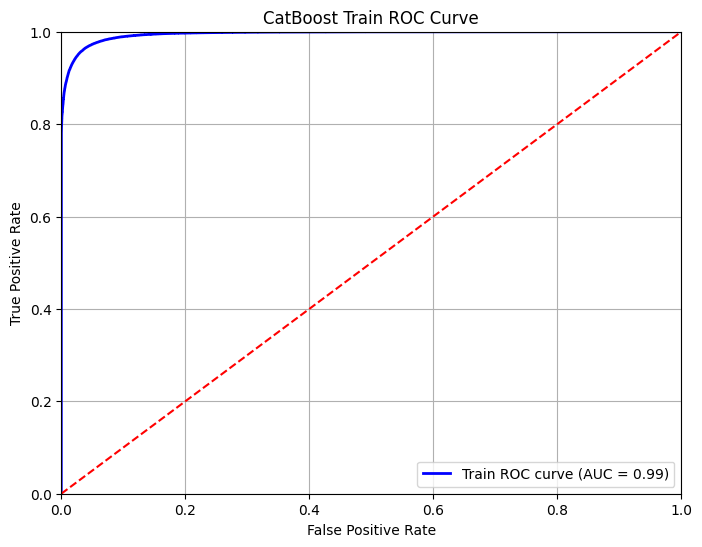

CatBoost Train AUC: 0.99


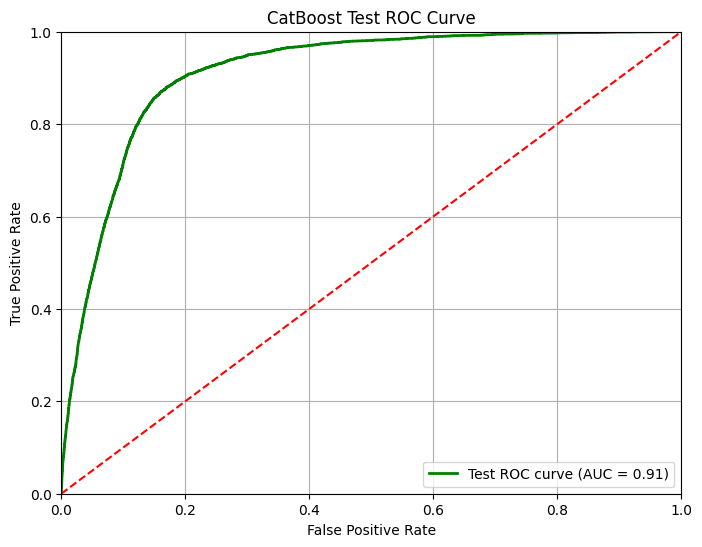

CatBoost Test AUC: 0.91


In [26]:
# Iterate through models, creating a pipeline for each
for name, model in models:
    # Create the pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('classifier', model)])

    # Fit the model
    pipeline.fit(x_train_scaled, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Make predictions using predict_proba on the training set
        y_train_pred_prob = pipeline.predict_proba(x_train_scaled)[:, 1]

        # Calculate ROC curve and AUC for the training set
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
        roc_auc_train = auc(fpr_train, tpr_train)

        # Plot the ROC curve for the training set
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Train ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        # Print AUC value for the training set
        print(f'{name} Train AUC: {roc_auc_train:.2f}')

        # Make predictions using predict_proba on the test set
        y_test_pred_prob = pipeline.predict_proba(x_test_scaled)[:, 1]

        # Calculate ROC curve and AUC for the test set
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
        roc_auc_test = auc(fpr_test, tpr_test)

        # Plot the ROC curve for the test set
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Test ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        # Print AUC value for the test set
        print(f'{name} Test AUC: {roc_auc_test:.2f}')

    else:
        print(f'{name} does not support predict_proba. Skipping ROC curve plotting.')

        # Predictions on the training set
        y_train_pred = pipeline.predict(x_train_scaled)
        print(f'{name} Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}')

        # Predictions on the test set
        y_test_pred = pipeline.predict(x_test_scaled)
        print(f'{name} Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

In [28]:
log = LogisticRegression()

log.fit(x_train_scaled, y_train)

LogisticRegression()

In [29]:
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [30]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [31]:
test.drop(columns = ['Name','Academic Pressure','CGPA','Study Satisfaction'] , inplace = True)

In [32]:
test.isnull().sum()/len(test)*100

id                                        0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.260128
Work Pressure                            20.019190
Job Satisfaction                         20.014925
Sleep Duration                            0.000000
Dietary Habits                            0.005330
Degree                                    0.002132
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
dtype: float64

In [33]:
df = test
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [ ]:
t = ['Profession','Work Pressure','Job Satisfaction','Dietary Habits','Degree']
test.info()

In [34]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Degree'] = df['Degree'].fillna(df['Degree'].mode()[0])

In [35]:
print('Work Pressure' , df['Work Pressure'].skew())
print('Job Satisfaction' , df['Job Satisfaction'].skew())

Work Pressure 0.010377706532405134
Job Satisfaction 0.0701781169287058


In [36]:
df['Work Pressure'] = df['Work Pressure'].fillna(df['Work Pressure'].mean())
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(df['Job Satisfaction'].mean())

In [37]:
test.isnull().sum()/len(test)*100

id                                       0.0
Gender                                   0.0
Age                                      0.0
City                                     0.0
Working Professional or Student          0.0
Profession                               0.0
Work Pressure                            0.0
Job Satisfaction                         0.0
Sleep Duration                           0.0
Dietary Habits                           0.0
Degree                                   0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
dtype: float64

In [39]:
outlier_columns = detect_outliers_in_columns(df)
print("Columns with outliers:", outlier_columns)

outlier_counts = count_of_outliers(df, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: []
Outlier counts per column: {}


In [40]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])

df['City' ]  = lab.fit_transform(df['City'])
df['Profession' ]  = lab.fit_transform(df['Profession'])
df['Have you ever had suicidal thoughts ?' ]  = lab.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness' ]  = lab.fit_transform(df['Family History of Mental Illness'])
df['Degree' ]  = lab.fit_transform(df['Degree'])
df['Working Professional or Student' ]  = lab.fit_transform(df['Working Professional or Student'])

In [41]:
df.drop(columns = ['Dietary Habits'] , inplace = True)

In [42]:
df.drop(columns = ['Sleep Duration'] , inplace = True)

In [43]:
df.drop(columns = ['id'] , inplace = True)

In [44]:
scaler = StandardScaler()
test = scaler.fit_transform(df)

# Convert the result back to a DataFrame
test_scaled = pd.DataFrame(test, columns=df.columns)


In [47]:
y_pred = log.predict(test_scaled)

In [48]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [49]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [51]:
y_pred.shape

(93800,)

In [50]:
sub.shape

(93800, 2)

In [54]:
for i in range(len(y_pred)):
    sub.loc[i, 'Depression'] = y_pred[i]
sub.head(4)
sub.to_csv('SV_submission_logistic_regression.csv',index=False)